In [4]:
'''# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session'''

'# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session'

In [5]:
import warnings
warnings.filterwarnings('ignore')


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# car = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv")
car = pd.read_csv("CAR_DETAILS_FROM_CAR_DEKHO.csv")

In [8]:
car.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

### Adding new Variable for reference 

In [9]:
car['current']= 2020

### Adding new variable for Age column

In [10]:
car['age']=car['current']-car['year']

### Drop all non required or repeative data

In [11]:
car.drop(['current','year','name'],axis=1,inplace=True)
car.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0          60000      70000  Petrol  Individual       Manual   First Owner   
1         135000      50000  Petrol  Individual       Manual   First Owner   
2         600000     100000  Diesel  Individual       Manual   First Owner   
3         250000      46000  Petrol  Individual       Manual   First Owner   
4         450000     141000  Diesel  Individual       Manual  Second Owner   

   age  
0   13  
1   13  
2    8  
3    3  
4    6

In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  4340 non-null   int64 
 1   km_driven      4340 non-null   int64 
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   object
 6   age            4340 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


In [13]:
car.shape

(4340, 7)

In [14]:
car.describe()

selling_price      km_driven          age
count   4.340000e+03    4340.000000  4340.000000
mean    5.041273e+05   66215.777419     6.909217
std     5.785487e+05   46644.102194     4.215344
min     2.000000e+04       1.000000     0.000000
25%     2.087498e+05   35000.000000     4.000000
50%     3.500000e+05   60000.000000     6.000000
75%     6.000000e+05   90000.000000     9.000000
max     8.900000e+06  806599.000000    28.000000

#Point to note
- Dataset has 4340 rows and 7 columns.
- Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

- We will analyse and finalize whether to convert them to categorical or treat as integer.

# DATA QUALITY CHECK

## Check for NULL/MISSING values

In [15]:
# percentage of missing values in each column
round(100*(car.isnull().sum()/len(car)),2).sort_values(ascending = False)

age              0.0
owner            0.0
transmission     0.0
seller_type      0.0
fuel             0.0
km_driven        0.0
selling_price    0.0
dtype: float64

In [16]:
# percentage of missing values in each row
round(100*(car.isnull().sum(axis=1)/len(car)),2).sort_values(ascending = False)

4339    0.0
1440    0.0
1454    0.0
1453    0.0
1452    0.0
       ... 
2888    0.0
2887    0.0
2886    0.0
2885    0.0
0       0.0
Length: 4340, dtype: float64

## Finding
- There are no missing / Null values either in columns or rows


## Duplicate Check

In [17]:
car_dub=car.copy()
# Checking for duplicates and dropping the entire duplicate row if any
car_dub.drop_duplicates(subset=None, inplace=True)

In [18]:
car_dub.shape

(3498, 7)

In [19]:
car.shape

(4340, 7)

# Insights
- The shape after running the drop duplicate command is not same as the original dataframe.



## Assign non duplicates records to orginal record 

In [20]:
car=car_dub
car.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0          60000      70000  Petrol  Individual       Manual   First Owner   
1         135000      50000  Petrol  Individual       Manual   First Owner   
2         600000     100000  Diesel  Individual       Manual   First Owner   
3         250000      46000  Petrol  Individual       Manual   First Owner   
4         450000     141000  Diesel  Individual       Manual  Second Owner   

   age  
0   13  
1   13  
2    8  
3    3  
4    6

In [21]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  3498 non-null   int64 
 1   km_driven      3498 non-null   int64 
 2   fuel           3498 non-null   object
 3   seller_type    3498 non-null   object
 4   transmission   3498 non-null   object
 5   owner          3498 non-null   object
 6   age            3498 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 218.6+ KB


In [22]:
car.shape

(3498, 7)

# Data Cleaning

Checking value_counts() for entire dataframe.

This will help to identify any Unknow/Junk values present in the dataset.

In [23]:
for col in car:
    print(car[col].value_counts(ascending=False), '\n\n\n')

300000     122
250000     107
350000     104
550000      82
500000      81
          ... 
1735000      1
755000       1
30000        1
841000       1
1825000      1
Name: selling_price, Length: 445, dtype: int64 



70000     202
80000     197
120000    192
60000     189
50000     171
         ... 
141440      1
74113       1
240000      1
22288       1
34823       1
Name: km_driven, Length: 770, dtype: int64 



Diesel      1762
Petrol      1676
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64 



Individual          2753
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64 



Manual       3187
Automatic     311
Name: transmission, dtype: int64 



First Owner             2157
Second Owner             964
Third Owner              285
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64 



3     336
8     332
5     327
6     315
7     290
2     285
4     273
9     244
10    205
11    167
1     156


### Insights
- There seems to be no Junk/Unknown values in the entire dataset.

# Creating Dummy Variables
- We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

- Before creating dummy variables, we will have to convert them into 'category' data types.

In [24]:
#To hold original data & column after duplicates are removed
car_o=car.copy()

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  3498 non-null   int64 
 1   km_driven      3498 non-null   int64 
 2   fuel           3498 non-null   object
 3   seller_type    3498 non-null   object
 4   transmission   3498 non-null   object
 5   owner          3498 non-null   object
 6   age            3498 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 218.6+ KB


In [26]:
# Convert to 'category' data type
car['fuel']=car['fuel'].astype('category')
car['seller_type']=car['seller_type'].astype('category')
car['transmission']=car['transmission'].astype('category')
car['owner']=car['owner'].astype('category')

In [27]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   selling_price  3498 non-null   int64   
 1   km_driven      3498 non-null   int64   
 2   fuel           3498 non-null   category
 3   seller_type    3498 non-null   category
 4   transmission   3498 non-null   category
 5   owner          3498 non-null   category
 6   age            3498 non-null   int64   
dtypes: category(4), int64(3)
memory usage: 123.6 KB


In [28]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

car = pd.get_dummies(car, drop_first=True)
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   selling_price                 3498 non-null   int64
 1   km_driven                     3498 non-null   int64
 2   age                           3498 non-null   int64
 3   fuel_Diesel                   3498 non-null   uint8
 4   fuel_Electric                 3498 non-null   uint8
 5   fuel_LPG                      3498 non-null   uint8
 6   fuel_Petrol                   3498 non-null   uint8
 7   seller_type_Individual        3498 non-null   uint8
 8   seller_type_Trustmark Dealer  3498 non-null   uint8
 9   transmission_Manual           3498 non-null   uint8
 10  owner_Fourth & Above Owner    3498 non-null   uint8
 11  owner_Second Owner            3498 non-null   uint8
 12  owner_Test Drive Car          3498 non-null   uint8
 13  owner_Third Owner             349

# SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
- We will use train_test_split method from sklearn package for this

In [29]:
# Check the shape before spliting

car.shape


(3498, 14)

In [30]:
# Check the info before spliting

car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   selling_price                 3498 non-null   int64
 1   km_driven                     3498 non-null   int64
 2   age                           3498 non-null   int64
 3   fuel_Diesel                   3498 non-null   uint8
 4   fuel_Electric                 3498 non-null   uint8
 5   fuel_LPG                      3498 non-null   uint8
 6   fuel_Petrol                   3498 non-null   uint8
 7   seller_type_Individual        3498 non-null   uint8
 8   seller_type_Trustmark Dealer  3498 non-null   uint8
 9   transmission_Manual           3498 non-null   uint8
 10  owner_Fourth & Above Owner    3498 non-null   uint8
 11  owner_Second Owner            3498 non-null   uint8
 12  owner_Test Drive Car          3498 non-null   uint8
 13  owner_Third Owner             349

In [31]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.70, test_size = 0.30, random_state = 100)

- Verify the info and shape of the dataframes after split:

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 3797 to 1725
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   selling_price                 2448 non-null   int64
 1   km_driven                     2448 non-null   int64
 2   age                           2448 non-null   int64
 3   fuel_Diesel                   2448 non-null   uint8
 4   fuel_Electric                 2448 non-null   uint8
 5   fuel_LPG                      2448 non-null   uint8
 6   fuel_Petrol                   2448 non-null   uint8
 7   seller_type_Individual        2448 non-null   uint8
 8   seller_type_Trustmark Dealer  2448 non-null   uint8
 9   transmission_Manual           2448 non-null   uint8
 10  owner_Fourth & Above Owner    2448 non-null   uint8
 11  owner_Second Owner            2448 non-null   uint8
 12  owner_Test Drive Car          2448 non-null   uint8
 13  owner_Third Owner             

In [33]:
df_train.shape

(2448, 14)

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 982 to 4291
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   selling_price                 1050 non-null   int64
 1   km_driven                     1050 non-null   int64
 2   age                           1050 non-null   int64
 3   fuel_Diesel                   1050 non-null   uint8
 4   fuel_Electric                 1050 non-null   uint8
 5   fuel_LPG                      1050 non-null   uint8
 6   fuel_Petrol                   1050 non-null   uint8
 7   seller_type_Individual        1050 non-null   uint8
 8   seller_type_Trustmark Dealer  1050 non-null   uint8
 9   transmission_Manual           1050 non-null   uint8
 10  owner_Fourth & Above Owner    1050 non-null   uint8
 11  owner_Second Owner            1050 non-null   uint8
 12  owner_Test Drive Car          1050 non-null   uint8
 13  owner_Third Owner             1

In [35]:
df_test.shape

(1050, 14)

# EXPLORATORY DATA ANALYSIS
- We need to perform the EDA on TRAINING (df_train) Dataset.


## Visualising Numeric Variables
- Let's make a pairplot of all the numeric variables.

In [36]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 3797 to 1725
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   selling_price                 2448 non-null   int64
 1   km_driven                     2448 non-null   int64
 2   age                           2448 non-null   int64
 3   fuel_Diesel                   2448 non-null   uint8
 4   fuel_Electric                 2448 non-null   uint8
 5   fuel_LPG                      2448 non-null   uint8
 6   fuel_Petrol                   2448 non-null   uint8
 7   seller_type_Individual        2448 non-null   uint8
 8   seller_type_Trustmark Dealer  2448 non-null   uint8
 9   transmission_Manual           2448 non-null   uint8
 10  owner_Fourth & Above Owner    2448 non-null   uint8
 11  owner_Second Owner            2448 non-null   uint8
 12  owner_Test Drive Car          2448 non-null   uint8
 13  owner_Third Owner             

In [37]:
df_train.columns

Index(['selling_price', 'km_driven', 'age', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

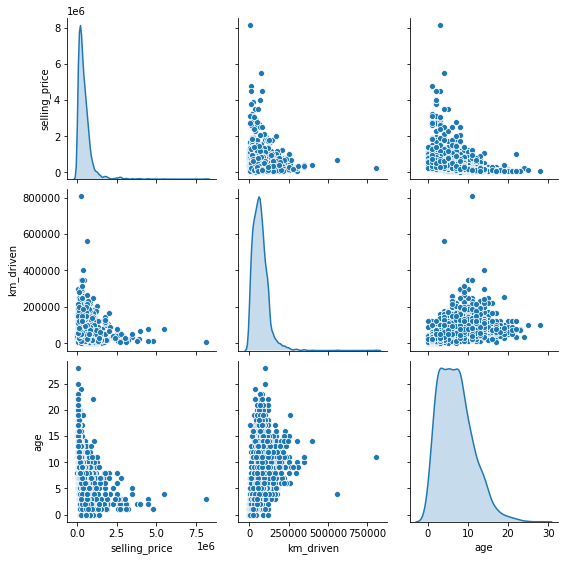

In [38]:
# Create a new dataframe of only numeric variables:

car_n=df_train[[ 'selling_price', 'km_driven', 'age']]

sns.pairplot(car_n, diag_kind='kde')
plt.show()

### Insights
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'selling_price','km_driven' and 'age'

## Visualising Catagorical Variables

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 3797 to 1725
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   selling_price                 2448 non-null   int64
 1   km_driven                     2448 non-null   int64
 2   age                           2448 non-null   int64
 3   fuel_Diesel                   2448 non-null   uint8
 4   fuel_Electric                 2448 non-null   uint8
 5   fuel_LPG                      2448 non-null   uint8
 6   fuel_Petrol                   2448 non-null   uint8
 7   seller_type_Individual        2448 non-null   uint8
 8   seller_type_Trustmark Dealer  2448 non-null   uint8
 9   transmission_Manual           2448 non-null   uint8
 10  owner_Fourth & Above Owner    2448 non-null   uint8
 11  owner_Second Owner            2448 non-null   uint8
 12  owner_Test Drive Car          2448 non-null   uint8
 13  owner_Third Owner             

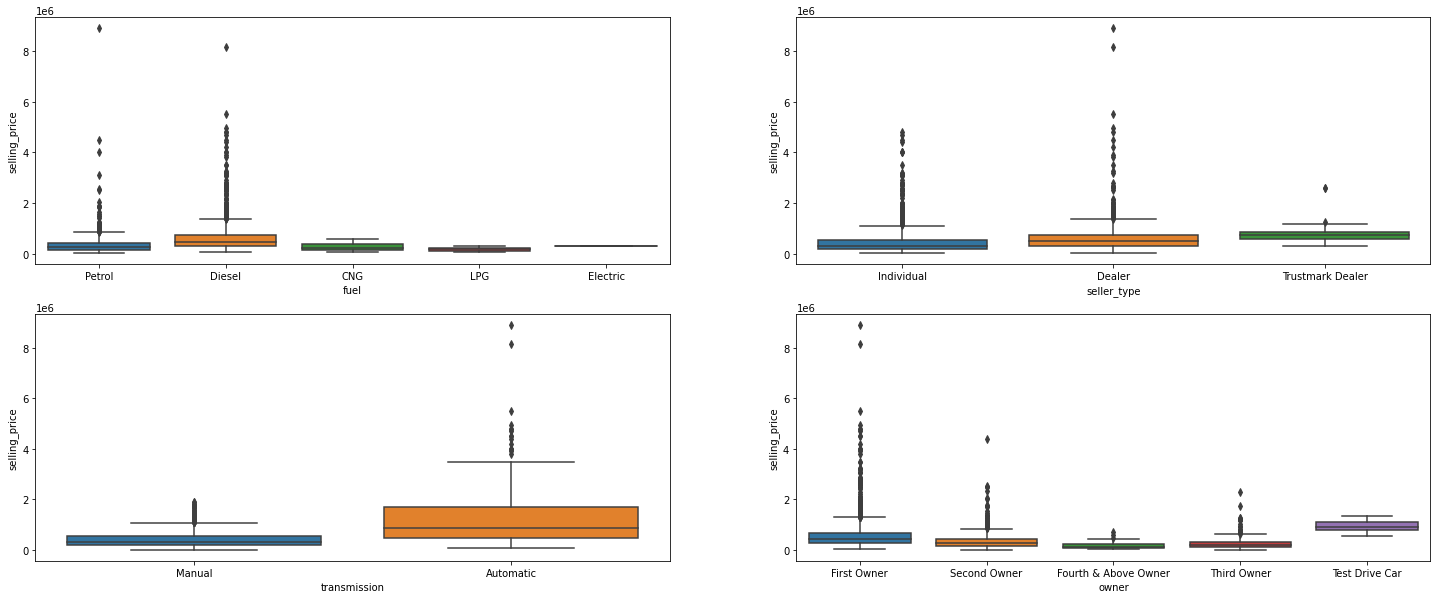

In [40]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'selling_price' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'fuel', y = 'selling_price', data = car_o)
plt.subplot(2,2,2)
sns.boxplot(x = 'seller_type', y = 'selling_price', data = car_o)
plt.subplot(2,2,3)
sns.boxplot(x = 'transmission', y = 'selling_price', data = car_o)
plt.subplot(2,2,4)
sns.boxplot(x = 'owner', y = 'selling_price', data = car_o)

plt.show()

- There were 4 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘selling_price’) .

The inference that We could derive were:

- **season :** Diesel & Petrol consists of 99% of all available fuel column data available. 
- **transmission :** Manual consists of 91% of all available transmission column data available.
- **seller_type :** Individual consists of 79% of all available seller_type column data available, i.e. highest in all.
- **seller_type :** First Owner consists of 61% of all available owner column data available, i.e. highest in all.




## Correlation Matrix

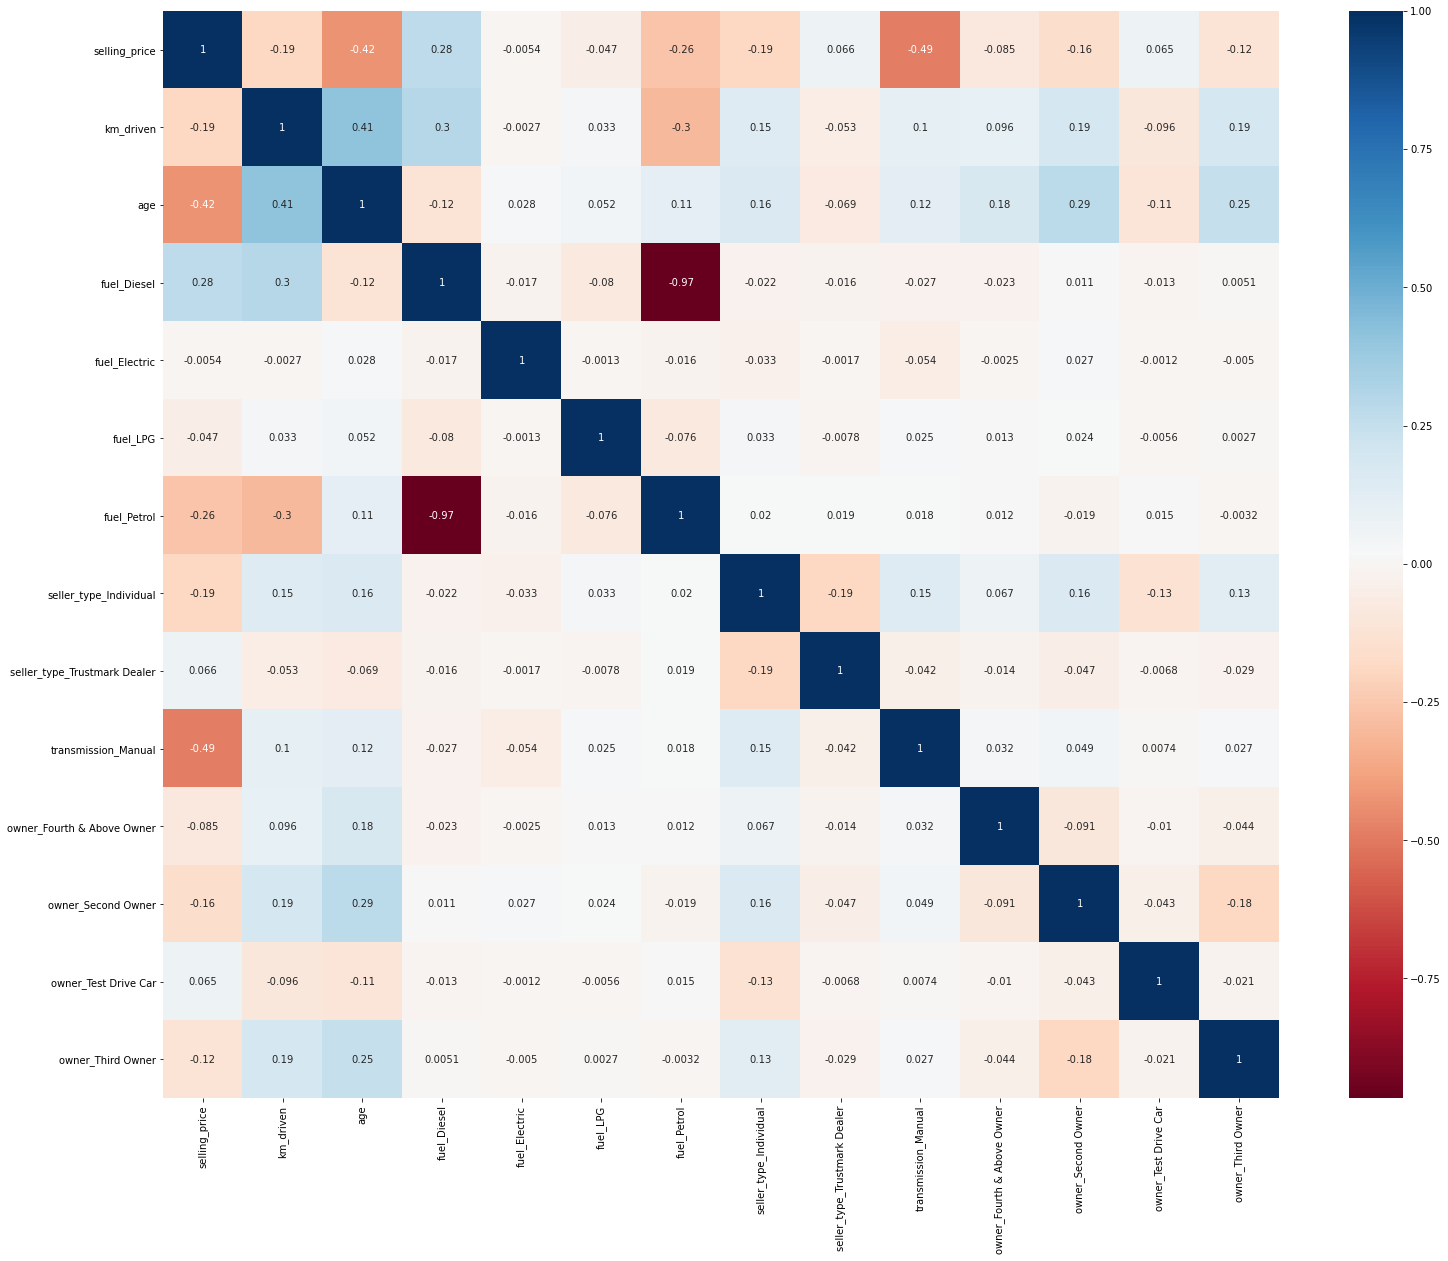

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: car) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(car.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights:
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## RESCALING THE FEATURES

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
# Checking the values before scaling
df_train.head()

selling_price  km_driven  age  fuel_Diesel  fuel_Electric  fuel_LPG  \
3797         150000      60000    6            0              0         0   
56           750000      29000    2            1              0         0   
67           151000      66764   11            0              0         0   
2710         250000      70000   11            0              0         0   
3579          65000      60000    9            0              0         0   

      fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
3797            1                       1                             0   
56              0                       0                             0   
67              1                       0                             0   
2710            1                       1                             0   
3579            1                       1                             0   

      transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
3797                    1                           0                   1   
56                      1                           0                   0   
67                      1                           0                   1   
2710                    1                           0                   0   
3579                    1                           0                   1   

      owner_Test Drive Car  owner_Third Owner  
3797                     0                  0  
56                       0                  0  
67                       0                  0  
2710                     0                  1  
3579                     0                  0

In [45]:
df_train.columns

Index(['selling_price', 'km_driven', 'age', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [46]:
 #Apply scaler() to all the numeric variables

num_vars = ['selling_price', 'km_driven', 'age']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [47]:
df_train.head()

selling_price  km_driven       age  fuel_Diesel  fuel_Electric  \
3797       0.015990   0.074270  0.214286            0              0   
56         0.089791   0.035833  0.071429            1              0   
67         0.016113   0.082657  0.392857            0              0   
2710       0.028290   0.086670  0.392857            0              0   
3579       0.005535   0.074270  0.321429            0              0   

      fuel_LPG  fuel_Petrol  seller_type_Individual  \
3797         0            1                       1   
56           0            0                       0   
67           0            1                       0   
2710         0            1                       1   
3579         0            1                       1   

      seller_type_Trustmark Dealer  transmission_Manual  \
3797                             0                    1   
56                               0                    1   
67                               0                    1   
2710                             0                    1   
3579                             0                    1   

      owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
3797                           0                   1                     0   
56                             0                   0                     0   
67                             0                   1                     0   
2710                           0                   0                     0   
3579                           0                   1                     0   

      owner_Third Owner  
3797                  0  
56                    0  
67                    0  
2710                  1  
3579                  0

In [48]:
df_train.describe()

selling_price    km_driven          age  fuel_Diesel  fuel_Electric  \
count    2448.000000  2448.000000  2448.000000  2448.000000    2448.000000   
mean        0.055326     0.087130     0.252086     0.501634       0.000408   
std         0.059725     0.061750     0.151644     0.500099       0.020211   
min         0.000000     0.000000     0.000000     0.000000       0.000000   
25%         0.022140     0.045752     0.142857     0.000000       0.000000   
50%         0.040590     0.078360     0.250000     1.000000       0.000000   
75%         0.071341     0.111468     0.357143     1.000000       0.000000   
max         1.000000     1.000000     1.000000     1.000000       1.000000   

          fuel_LPG  fuel_Petrol  seller_type_Individual  \
count  2448.000000  2448.000000             2448.000000   
mean      0.006127     0.479575                0.784314   
std       0.078054     0.499685                0.411382   
min       0.000000     0.000000                0.000000   
25%       0.000000     0.000000                1.000000   
50%       0.000000     0.000000                1.000000   
75%       0.000000     1.000000                1.000000   
max       1.000000     1.000000                1.000000   

       seller_type_Trustmark Dealer  transmission_Manual  \
count                   2448.000000          2448.000000   
mean                       0.009804             0.912173   
std                        0.098548             0.283101   
min                        0.000000             0.000000   
25%                        0.000000             1.000000   
50%                        0.000000             1.000000   
75%                        0.000000             1.000000   
max                        1.000000             1.000000   

       owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
count                 2448.000000         2448.000000           2448.000000   
mean                     0.022059            0.274918              0.004493   
std                      0.146905            0.446564              0.066896   
min                      0.000000            0.000000              0.000000   
25%                      0.000000            0.000000              0.000000   
50%                      0.000000            0.000000              0.000000   
75%                      0.000000            1.000000              0.000000   
max                      1.000000            1.000000              1.000000   

       owner_Third Owner  
count        2448.000000  
mean            0.081291  
std             0.273337  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000

# BUILDING A LINEAR MODEL



## Dividing into X and Y sets for the model building

In [49]:
y_train = df_train.pop('selling_price')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 7
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 7)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('km_driven', True, 1),
 ('age', True, 1),
 ('fuel_Diesel', True, 1),
 ('fuel_Electric', True, 1),
 ('fuel_LPG', False, 5),
 ('fuel_Petrol', False, 6),
 ('seller_type_Individual', False, 4),
 ('seller_type_Trustmark Dealer', True, 1),
 ('transmission_Manual', True, 1),
 ('owner_Fourth & Above Owner', False, 7),
 ('owner_Second Owner', False, 3),
 ('owner_Test Drive Car', True, 1),
 ('owner_Third Owner', False, 2)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['km_driven', 'age', 'fuel_Diesel', 'fuel_Electric',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Test Drive Car'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Third Owner'],
      dtype='object')

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Model using 'STATS MODEL'

## Model 1

### VIF Check

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                           age  4.44
5           transmission_Manual  4.32
0                     km_driven  4.22
2                   fuel_Diesel  2.20
4  seller_type_Trustmark Dealer  1.01
6          owner_Test Drive Car  1.01
3                 fuel_Electric  1.00

In [57]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [58]:
# Check the parameters obtained

lr1.params

const                           0.158445
km_driven                      -0.078702
age                            -0.130406
fuel_Diesel                     0.032372
fuel_Electric                  -0.051531
seller_type_Trustmark Dealer    0.023867
transmission_Manual            -0.087648
owner_Test Drive Car            0.024443
dtype: float64

In [59]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     269.2
Date:                Fri, 19 Mar 2021   Prob (F-statistic):          1.33e-297
Time:                        21:31:39   Log-Likelihood:                 4125.8
No. Observations:                2448   AIC:                            -8236.
Df Residuals:                    2440   BIC:                            -8189.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Model 2
- Removing the variable 'fuel_Electric' based on its High p-value 

In [60]:
X_train_new = X_train_rfe.drop(["fuel_Electric"], axis = 1)

### VIF

In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                           age  4.42
4           transmission_Manual  4.31
0                     km_driven  4.22
2                   fuel_Diesel  2.20
3  seller_type_Trustmark Dealer  1.01
5          owner_Test Drive Car  1.01

In [62]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [63]:
# Check the parameters obtained

lr2.params

const                           0.158239
km_driven                      -0.078528
age                            -0.130701
fuel_Diesel                     0.032399
seller_type_Trustmark Dealer    0.023874
transmission_Manual            -0.087395
owner_Test Drive Car            0.024413
dtype: float64

In [64]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     313.8
Date:                Fri, 19 Mar 2021   Prob (F-statistic):          1.38e-298
Time:                        21:31:39   Log-Likelihood:                 4125.1
No. Observations:                2448   AIC:                            -8236.
Df Residuals:                    2441   BIC:                            -8196.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Model 3  
- Removing the variable 'owner_Test Drive Car' based on its High p-value

In [65]:
X_train_new = X_train_new.drop(["owner_Test Drive Car"], axis = 1)

### VIF Check

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                           age  4.41
4           transmission_Manual  4.26
0                     km_driven  4.22
2                   fuel_Diesel  2.20
3  seller_type_Trustmark Dealer  1.01

In [67]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [68]:
# Check the parameters obtained

lr3.params

const                           0.158632
km_driven                      -0.080031
age                            -0.131571
fuel_Diesel                     0.032402
seller_type_Trustmark Dealer    0.023609
transmission_Manual            -0.087321
dtype: float64

In [69]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     375.5
Date:                Fri, 19 Mar 2021   Prob (F-statistic):          3.32e-299
Time:                        21:31:40   Log-Likelihood:                 4123.5
No. Observations:                2448   AIC:                            -8235.
Df Residuals:                    2442   BIC:                            -8200.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Model 4
-Removing the variable 'seller_type_Trustmark Dealer ' based on its High p-value

In [70]:
X_train_new = X_train_new.drop(["seller_type_Trustmark Dealer"], axis = 1)

### VIF Check

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                  age  4.41
3  transmission_Manual  4.23
0            km_driven  4.21
2          fuel_Diesel  2.20

In [72]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [73]:
# Check the parameters obtained

lr4.params

const                  0.159292
km_driven             -0.081104
age                   -0.132559
fuel_Diesel            0.032289
transmission_Manual   -0.087353
dtype: float64

In [74]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     466.7
Date:                Fri, 19 Mar 2021   Prob (F-statistic):          3.70e-299
Time:                        21:31:40   Log-Likelihood:                 4120.3
No. Observations:                2448   AIC:                            -8231.
Df Residuals:                    2443   BIC:                            -8202.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1593    

### Insights
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation

## Hypothesis Testing:

### Hypothesis testing states that:

- H0:B1=B2=...=Bn=0
- H1: at least one Bi!=0

lr4 model coefficient values
- const                  0.159292
- km_driven             -0.081104
- age                   -0.132559
- fuel_Diesel            0.032289
- transmission_Manual   -0.087353

### Insights
- From the lr4  model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS

### F Statistics

#### F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic:                     466.7
- Prob (F-statistic):          3.70e-299
The F-Statistics value of 466.7 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

# The equation of best fitted surface based on model lr4:

**selling_price** = 0.159292 - (**km_driven** * **0.081104**) - (**age** * 0.132559) + ( **fuel_Diesel** * 0.032289) - ( **transmission_Manual** * 0.087353)

### Interpretation of Coefficients:

- **km_driven**: A coefficient value of ‘0.081104’ indicated that a unit increase in km_driven variable, decreases the selling_price numbers by 0.081104 units.

- **age**: A coefficient value of ‘-0.132559’ indicated that, a unit increase in age  variable, decreases the selling_price numbers by 0.132559 units.

- **fuel_Diesel**: A coefficient value of ‘0.032289’ indicated that w.r.t Petrol, a unit increase in fuel_Diesel variable increases the selling_price numbers by 0.032289 units.

- **transmission_Manual**: A coefficient value of ‘-0.087353’ indicated that w.r.t Automatic, a unit increase in transmission_Manual variable decreases the selling_price numbers by 0.087353 units.

#  ASSUMPTIONS

## Error terms are normally distributed with mean zero (not X, Y)

- Residual Analysis Of Training Data

In [75]:
y_train_pred = lr4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

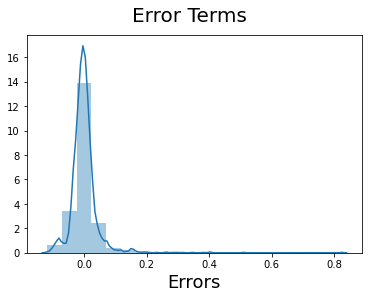

In [76]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

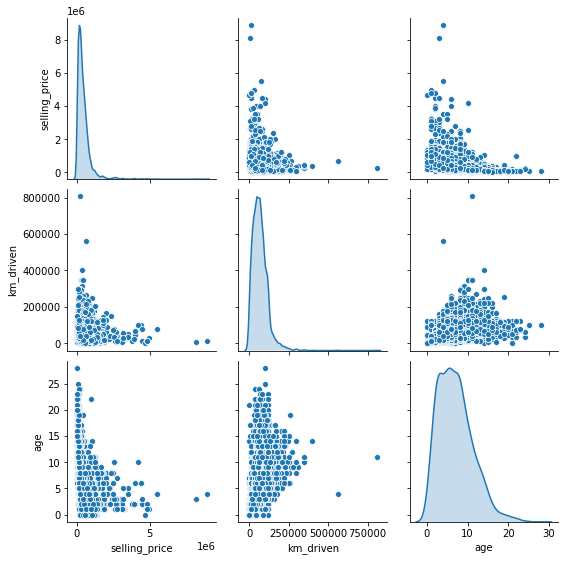

In [77]:
car_n=car[[ 'selling_price', 'km_driven', 'age']]

sns.pairplot(car_n, diag_kind='kde')
plt.show()

### Insight
- Using the pair plot, we could see there is a linear relation between km_driven and age variable with the predictor ‘selling_price’.

## There is No Multicollinearity between the predictor variables

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
1                  age  4.41
3  transmission_Manual  4.23
0            km_driven  4.21
2          fuel_Diesel  2.20

### Insight
- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# MAKING PREDICTION USING FINAL MODEL


Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr4)

### Applying the scaling on the test sets

In [79]:
#Apply scaler() to all the numeric variables

num_vars = ['selling_price', 'km_driven', 'age']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [80]:
df_test.head()

selling_price  km_driven       age  fuel_Diesel  fuel_Electric  \
982        0.073553   0.219997  0.208333            0              0   
2309       0.025681   0.063330  0.125000            0              0   
1025       0.008223   0.233331  0.375000            1              0   
3744       0.038635   0.399998  0.291667            1              0   
1552       0.017234   0.453332  0.458333            1              0   

      fuel_LPG  fuel_Petrol  seller_type_Individual  \
982          0            1                       1   
2309         0            1                       1   
1025         0            0                       1   
3744         0            0                       1   
1552         0            0                       1   

      seller_type_Trustmark Dealer  transmission_Manual  \
982                              0                    1   
2309                             0                    1   
1025                             0                    1   
3744                             0                    1   
1552                             0                    1   

      owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
982                            0                   0                     0   
2309                           0                   0                     0   
1025                           0                   0                     0   
3744                           0                   0                     0   
1552                           0                   1                     0   

      owner_Third Owner  
982                   0  
2309                  0  
1025                  0  
3744                  0  
1552                  0

In [81]:
df_test.describe()

selling_price    km_driven          age  fuel_Diesel  fuel_Electric  \
count    1050.000000  1050.000000  1050.000000  1050.000000         1050.0   
mean        0.052495     0.225113     0.294524     0.508571            0.0   
std         0.064583     0.142527     0.178533     0.500165            0.0   
min         0.000000     0.000000     0.000000     0.000000            0.0   
25%         0.020050     0.120830     0.166667     0.000000            0.0   
50%         0.036157     0.199997     0.250000     1.000000            0.0   
75%         0.064908     0.299998     0.416667     1.000000            0.0   
max         1.000000     1.000000     1.000000     1.000000            0.0   

          fuel_LPG  fuel_Petrol  seller_type_Individual  \
count  1050.000000  1050.000000             1050.000000   
mean      0.006667     0.478095                0.793333   
std       0.081416     0.499758                0.405107   
min       0.000000     0.000000                0.000000   
25%       0.000000     0.000000                1.000000   
50%       0.000000     0.000000                1.000000   
75%       0.000000     1.000000                1.000000   
max       1.000000     1.000000                1.000000   

       seller_type_Trustmark Dealer  transmission_Manual  \
count                   1050.000000          1050.000000   
mean                       0.008571             0.908571   
std                        0.092228             0.288355   
min                        0.000000             0.000000   
25%                        0.000000             1.000000   
50%                        0.000000             1.000000   
75%                        0.000000             1.000000   
max                        1.000000             1.000000   

       owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
count                 1050.000000         1050.000000           1050.000000   
mean                     0.020000            0.277143              0.005714   
std                      0.140067            0.447801              0.075413   
min                      0.000000            0.000000              0.000000   
25%                      0.000000            0.000000              0.000000   
50%                      0.000000            0.000000              0.000000   
75%                      0.000000            1.000000              0.000000   
max                      1.000000            1.000000              1.000000   

       owner_Third Owner  
count        1050.000000  
mean            0.081905  
std             0.274350  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000

### Dividing into X_test and y_test

In [82]:
y_test = df_test.pop('selling_price')
X_test = df_test
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 982 to 4291
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km_driven                     1050 non-null   float64
 1   age                           1050 non-null   float64
 2   fuel_Diesel                   1050 non-null   uint8  
 3   fuel_Electric                 1050 non-null   uint8  
 4   fuel_LPG                      1050 non-null   uint8  
 5   fuel_Petrol                   1050 non-null   uint8  
 6   seller_type_Individual        1050 non-null   uint8  
 7   seller_type_Trustmark Dealer  1050 non-null   uint8  
 8   transmission_Manual           1050 non-null   uint8  
 9   owner_Fourth & Above Owner    1050 non-null   uint8  
 10  owner_Second Owner            1050 non-null   uint8  
 11  owner_Test Drive Car          1050 non-null   uint8  
 12  owner_Third Owner             1050 non-null   uint8  
dtypes

In [83]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 982 to 4291
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                1050 non-null   float64
 1   km_driven            1050 non-null   float64
 2   age                  1050 non-null   float64
 3   fuel_Diesel          1050 non-null   uint8  
 4   transmission_Manual  1050 non-null   uint8  
dtypes: float64(3), uint8(2)
memory usage: 34.9 KB


In [84]:
# Making predictions using the final model (lr6)

y_pred = lr4.predict(X_test_lm4)

# MODEL EVALUATION

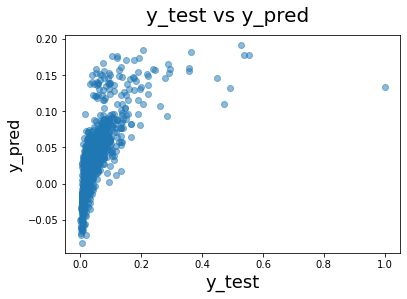

In [85]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 Value for TEST

In [86]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.36183712560830605

### Adjusted R^2 Value for TEST

In [87]:
# We already have the value of R^2 (calculated in above step)

r2=0.3618371256083056 

In [88]:
# Get the shape of X_test
X_test.shape

(1050, 4)

In [89]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.3593943969025001

### Final Result Comparison
- Train R^2 :0.433
- Train Adjusted R^2 :0.432
- Test R^2 :0.362 
- Test Adjusted R^2 :0.360

This seems to be a really good model that can moderate 'Generalize' various datasets.

# FINAL REPORT

As per our final Model, the top predictor variables that influences the selling_prize are:
- **km_driven**: A coefficient value of ‘0.081104’ indicated that a unit increase in km_driven variable, decreases the selling_price numbers by 0.081104 units.

- **age**: A coefficient value of ‘-0.132559’ indicated that, a unit increase in age  variable, decreases the selling_price numbers by 0.132559 units.

- **fuel_Diesel**: A coefficient value of ‘0.032289’ indicated that w.r.t Petrol, a unit increase in fuel_Diesel variable increases the selling_price numbers by 0.032289 units.

- **transmission_Manual**: A coefficient value of ‘-0.087353’ indicated that w.r.t Automatic, a unit increase in transmission_Manual variable decreases the selling_price numbers by 0.087353 units.